In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [11]:
df_sales = pd.read_csv('Cab_Data.csv')
df_trans = pd.read_csv('Transaction_ID.csv')
df_cust  = pd.read_csv('Customer_ID.csv')
df_city  = pd.read_csv('City.csv')


In [12]:
for df, name in zip([df_sales, df_trans, df_cust, df_city],
                    ['Cab_Data', 'Transaction_ID', 'Customer_ID', 'City']):
    print(f"{name} Shape: {df.shape}")
    display(df.head())


Cab_Data Shape: (359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Transaction_ID Shape: (440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Customer_ID Shape: (49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


City Shape: (20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
# Convert trip date
df_sales['trip_date'] = pd.to_datetime(df_sales['trip_date'])

# Drop duplicates
print("Duplicates in Transaction_ID:", df_trans.duplicated().sum())
df_trans.drop_duplicates(inplace=True)

# Fill NAs (only if needed)
if 'trip_distance' in df_sales.columns:
    df_sales['trip_distance'].fillna(df_sales['trip_distance'].median(), inplace=True)

if 'age' in df_cust.columns:
    df_cust['age'].fillna(df_cust['age'].median(), inplace=True)


KeyError: 'trip_date'

In [8]:
print(df_sales.columns)
print(df_sales.head())


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [16]:
# Convert trip date
df_sales['trip_date'] = pd.to_datetime(df_sales['trip_date'])

# Drop duplicates
print("Duplicates in Transaction_ID:", df_trans.duplicated().sum())
df_trans.drop_duplicates(inplace=True)

# Fill NAs (only if needed)
if 'trip_distance' in df_sales.columns:
    df_sales['trip_distance'].fillna(df_sales['trip_distance'].median(), inplace=True)

if 'age' in df_cust.columns:
    df_cust['age'].fillna(df_cust['age'].median(), inplace=True)


KeyError: 'trip_date'

In [15]:
print(df_sales.columns)
df_sales.rename(columns={'incorrect_column_name': 'trip_date'}, inplace=True)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')


In [20]:
# Rename column
df_sales.rename(columns={'Date of Travel': 'trip_date'}, inplace=True)

# Convert Excel-style serial date to datetime
df_sales['trip_date'] = pd.to_datetime(df_sales['trip_date'], origin='1899-12-30', unit='D')

# Check results
print(df_sales[['trip_date']].head())


   trip_date
0 2016-01-08
1 2016-01-06
2 2016-01-02
3 2016-01-07
4 2016-01-03


In [21]:
df_sales

,Transaction ID,trip_date,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [22]:
df_sales['profit'] = df_sales['Price Charged'] - df_sales['Cost of Trip']
print("Total Revenue:", df_sales['Price Charged'].sum())
print("Total Cost:", df_sales['Cost of Trip'].sum())
print("Total Profit:", df_sales['profit'].sum())


Total Revenue: 152182138.52000004
Total Cost: 102854437.02820005
Total Profit: 49327701.491799995


In [23]:
company_summary = df_sales.groupby('Company')[['Price Charged', 'Cost of Trip']].sum()
company_summary['Profit'] = company_summary['Price Charged'] - company_summary['Cost of Trip']
print(company_summary)


            Price Charged  Cost of Trip        Profit
Company                                              
Pink Cab     2.632825e+07  2.102092e+07  5.307328e+06
Yellow Cab   1.258539e+08  8.183351e+07  4.402037e+07


<Axes: title={'center': 'Top 10 Cities by Trip Count'}, ylabel='City'>

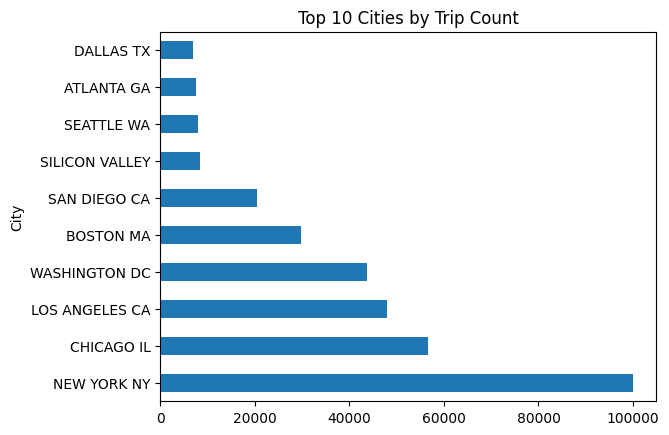

In [24]:
top_cities = df_sales['City'].value_counts().head(10)
top_cities.plot(kind='barh', title='Top 10 Cities by Trip Count')


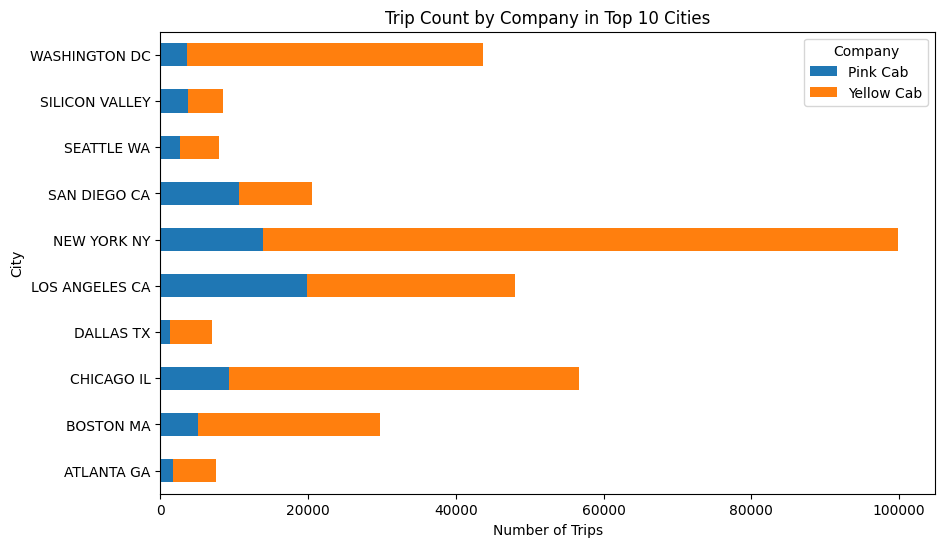

In [25]:
# Compare trip counts by company in top 10 cities
top_city_names = top_cities.index.tolist()
city_company_trips = df_sales[df_sales['City'].isin(top_city_names)]
city_company_counts = city_company_trips.groupby(['City', 'Company']).size().unstack()

city_company_counts.plot(kind='barh', stacked=True, figsize=(10, 6), title='Trip Count by Company in Top 10 Cities')
plt.xlabel("Number of Trips")
plt.show()


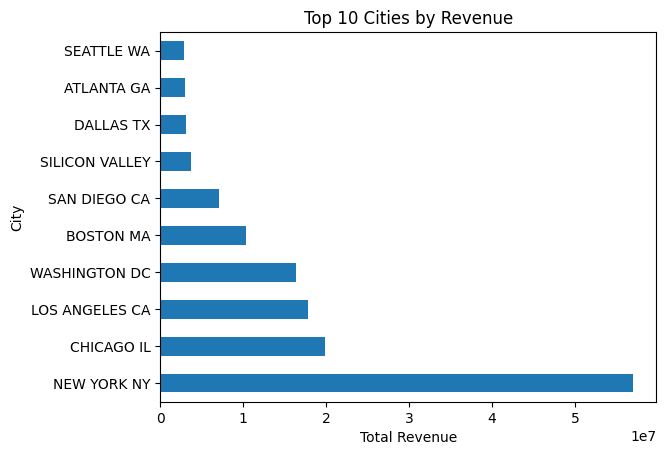

In [26]:
# Revenue = Price Charged
revenue_by_city = df_sales.groupby('City')['Price Charged'].sum().sort_values(ascending=False).head(10)
revenue_by_city.plot(kind='barh', title='Top 10 Cities by Revenue')
plt.xlabel("Total Revenue")
plt.show()


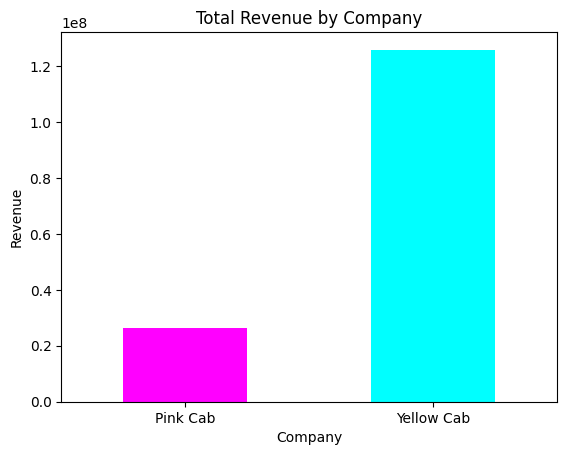

In [27]:
# Revenue by company
company_revenue = df_sales.groupby('Company')['Price Charged'].sum()
company_revenue.plot(kind='bar', title='Total Revenue by Company', color=['magenta', 'cyan'])
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()


In [28]:
df_sales['Profit'] = df_sales['Price Charged'] - df_sales['Cost of Trip']
df_sales['Margin (%)'] = (df_sales['Profit'] / df_sales['Price Charged']) * 100


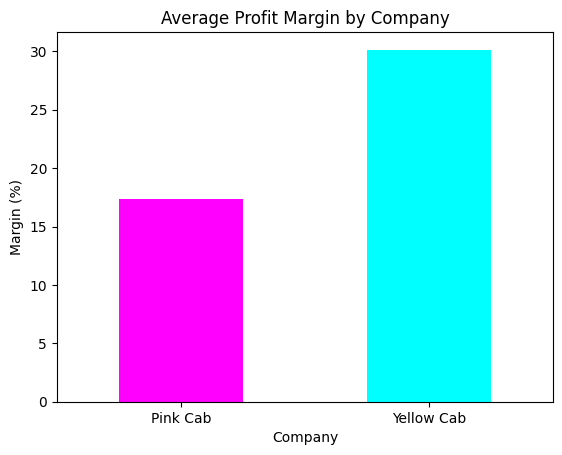

In [29]:
avg_margin = df_sales.groupby('Company')['Margin (%)'].mean()
avg_margin.plot(kind='bar', title='Average Profit Margin by Company', color=['magenta', 'cyan'])
plt.ylabel("Margin (%)")
plt.xticks(rotation=0)
plt.show()


In [35]:
df_sales['Month'] = df_sales['trip_date'].dt.to_period('M')


<Axes: title={'center': 'Monthly Trip Volume per Cab Company'}, xlabel='Month'>

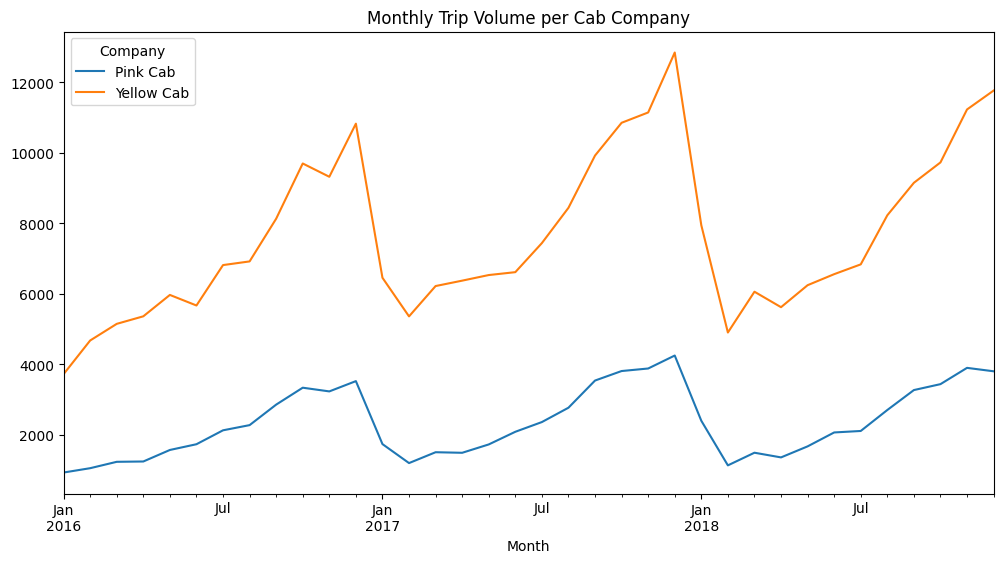

In [36]:
# Number of trips per company per month
monthly_trips = df_sales.groupby(['Month', 'Company'])['Transaction ID'].count().unstack()
monthly_trips.plot(kind='line', figsize=(12, 6), title='Monthly Trip Volume per Cab Company')


<Axes: title={'center': 'Monthly Revenue per Cab Company'}, xlabel='Month'>

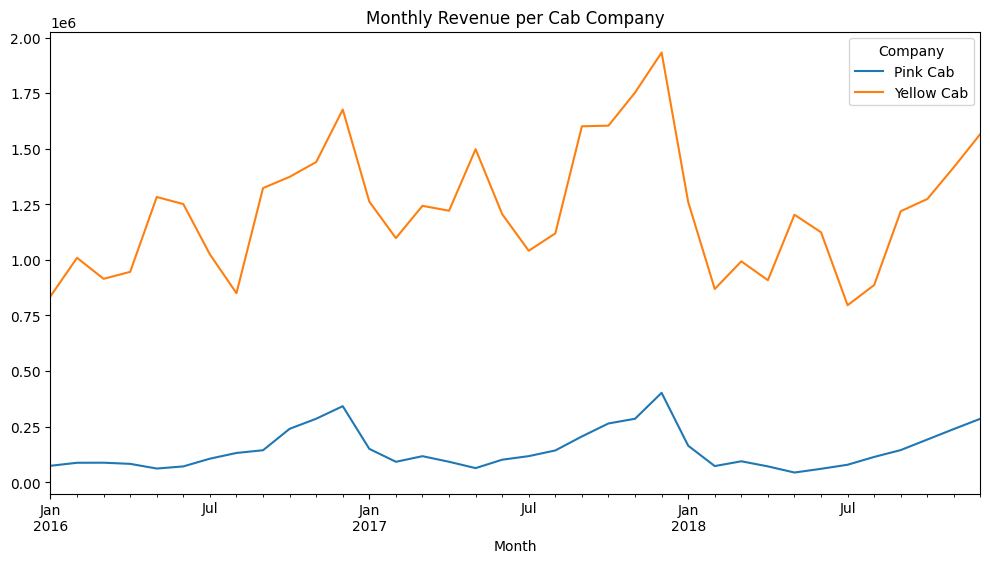

In [37]:
# Monthly revenue per company
df_sales['Revenue'] = df_sales['Price Charged'] - df_sales['Cost of Trip']
monthly_revenue = df_sales.groupby(['Month', 'Company'])['Revenue'].sum().unstack()
monthly_revenue.plot(kind='line', figsize=(12, 6), title='Monthly Revenue per Cab Company')


In [38]:
# Average revenue per trip
avg_revenue = df_sales.groupby('Company')['Revenue'].mean()
print("Average Revenue per Trip:\n", avg_revenue)

# Total revenue
total_revenue = df_sales.groupby('Company')['Revenue'].sum()
print("Total Revenue:\n", total_revenue)


Average Revenue per Trip:
 Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Revenue, dtype: float64
Total Revenue:
 Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Revenue, dtype: float64


<Axes: title={'center': 'Top 10 Cities by Total Revenue'}, ylabel='City'>

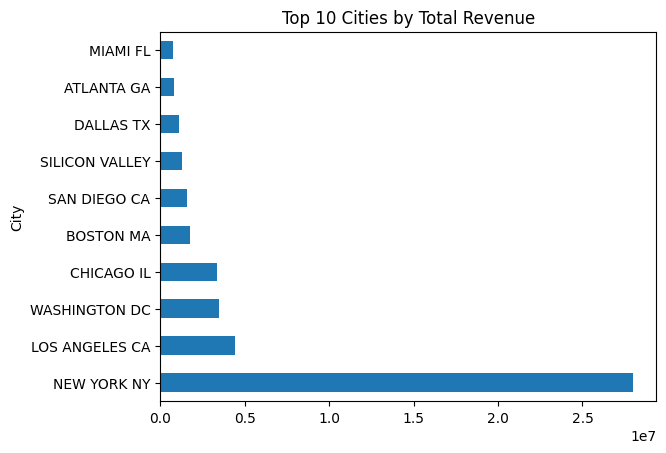

In [40]:
city_margin = df_sales.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(10)
city_margin.plot(kind='barh', title='Top 10 Cities by Total Revenue')


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

<Axes: title={'center': 'Average Revenue by Gender'}, xlabel='Gender', ylabel='Frequency'>

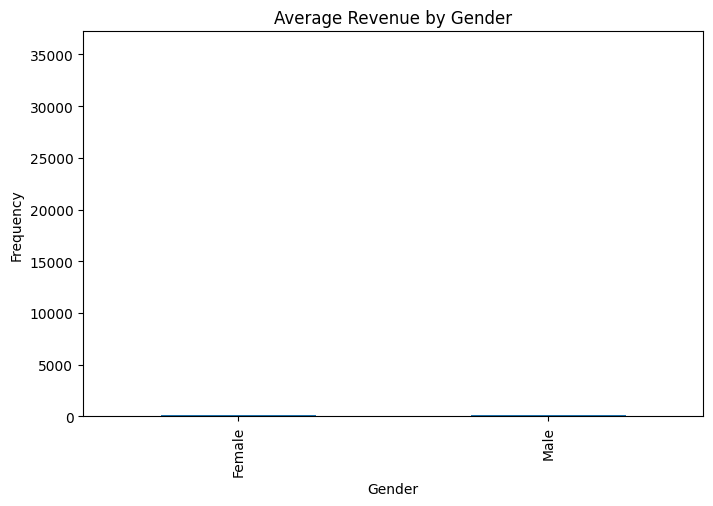

In [42]:
import pandas as pd

# Load all datasets
df_sales = pd.read_csv("Cab_Data.csv")
df_customer = pd.read_csv("Customer_ID.csv")
df_transaction = pd.read_csv("Transaction_ID.csv")
df_city = pd.read_csv("City.csv")

# Check the first few rows
print(df_sales.head())
print(df_customer.head())
print(df_transaction.head())
print(df_city.head())

# Merge Cab_Data with Transaction_ID on 'Transaction ID'
df_merged = df_sales.merge(df_transaction, on='Transaction ID')

# Merge the result with Customer_ID on 'Customer ID'
df_merged = df_merged.merge(df_customer, on='Customer ID')

# Finally merge with City data on 'City'
df_merged = df_merged.merge(df_city, on='City')

# Check merged data
df_merged.info()
df_merged.head()


# Age distribution
df_merged['Age'].plot.hist(bins=20, figsize=(8, 5), title='Customer Age Distribution')

# Revenue by Gender
df_merged['Revenue'] = df_merged['Price Charged'] - df_merged['Cost of Trip']
df_merged.groupby('Gender')['Revenue'].mean().plot(kind='bar', title='Average Revenue by Gender')


In [43]:
# Check for missing values
print(df_merged.isnull().sum())

# Check for duplicates
print(f"Duplicates: {df_merged.duplicated().sum()}")


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Revenue               0
dtype: int64
Duplicates: 0


In [44]:
# Summary stats
print(df_merged.describe(include='all'))

# Check column data types
print(df_merged.dtypes)


        Transaction ID  Date of Travel     Company         City  \
count     3.593920e+05   359392.000000      359392       359392   
unique             NaN             NaN           2           19   
top                NaN             NaN  Yellow Cab  NEW YORK NY   
freq               NaN             NaN      274681        99885   
mean      1.022076e+07    42964.067998         NaN          NaN   
std       1.268058e+05      307.467197         NaN          NaN   
min       1.000001e+07    42371.000000         NaN          NaN   
25%       1.011081e+07    42697.000000         NaN          NaN   
50%       1.022104e+07    42988.000000         NaN          NaN   
75%       1.033094e+07    43232.000000         NaN          NaN   
max       1.044011e+07    43465.000000         NaN          NaN   

         KM Travelled  Price Charged   Cost of Trip    Customer ID  \
count   359392.000000  359392.000000  359392.000000  359392.000000   
unique            NaN            NaN            NaN    

<Axes: title={'center': 'Total Revenue by Company'}, xlabel='Company'>

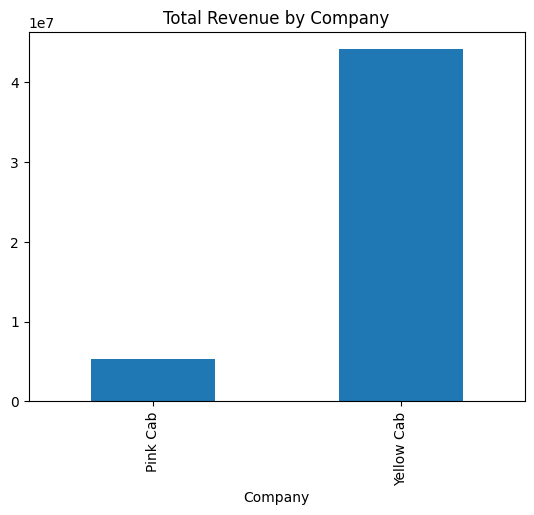

In [45]:
# Trip count by company
df_merged['Company'].value_counts().plot(kind='bar', title='Trip Count by Company')

# Total Revenue by Company
df_merged.groupby('Company')['Revenue'].sum().plot(kind='bar', title='Total Revenue by Company')


<Axes: title={'center': 'Revenue vs Customers by Company'}, xlabel='Company'>

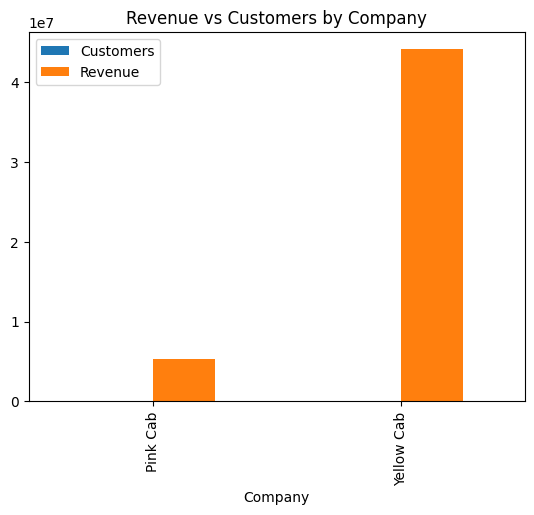

In [46]:
# Number of unique customers per company
customer_count = df_merged.groupby('Company')['Customer ID'].nunique()
revenue = df_merged.groupby('Company')['Revenue'].sum()

comparison = pd.DataFrame({'Customers': customer_count, 'Revenue': revenue})
comparison.plot(kind='bar', title='Revenue vs Customers by Company')


C:\Users\ATHARVA\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: title={'center': 'Trips Over Time'}, xlabel='Month'>

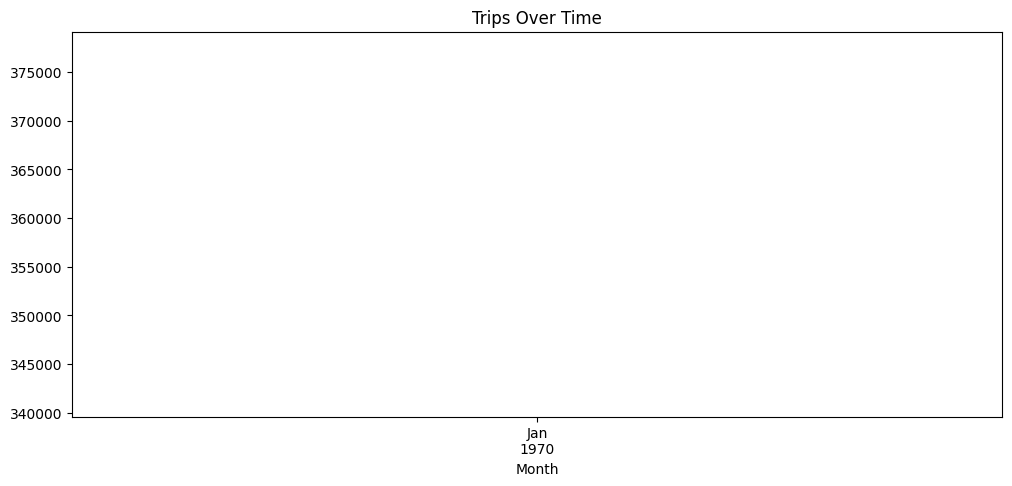

In [47]:
df_merged['trip_date'] = pd.to_datetime(df_merged['Date of Travel'])  # Use correct column name
df_merged['Month'] = df_merged['trip_date'].dt.to_period('M')

# Trips per month
df_merged.groupby('Month').size().plot(title='Trips Over Time', figsize=(12,5))

